In [ ]:
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b464c706a9b003d1c82e60e2b740846a45137239b84f36ab4bed6fad44b9b11f
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Accroding to our problem we will drop unwated column

In [ ]:
df['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

In [ ]:
columns_to_drop = ['Unnamed: 0', 'Data', 'Countries', 'Local', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk','Industry Sector']
df = df.drop(columns=columns_to_drop)


In [ ]:
df.head()

,Accident Level,Description
0,I,While removing the drill rod of the Jumbo 08 f...
1,I,During the activation of a sodium sulphide pum...
2,I,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,IV,Approximately at 11:45 a.m. in circumstances t...


Doing data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Accident Level  425 non-null    object
 1   Description     425 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [ ]:
df.isna().sum()

Accident Level    0
Description       0
dtype: int64

TEXT PREPROCESSING

In [ ]:
df['Accident Level'].value_counts()


I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [ ]:
df.head()

,Accident Level,Description
0,I,While removing the drill rod of the Jumbo 08 f...
1,I,During the activation of a sodium sulphide pum...
2,I,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,IV,Approximately at 11:45 a.m. in circumstances t...


# Text Normalization¶

Convertion to Lowercase

Removal of Whitespaces

Removal of Punctuations

Removal of Stop Words

Retainment of Relevant Parts of Speech¶

Stemming and Lemmatization

Removal of Additional Stop Words

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

In [ ]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

In [ ]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stops = stopwords.words("english") # stopwords
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")
#stop words removal
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in stops])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#POS
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

In [ ]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

In [ ]:
# All the function intergation

def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_punctuation(text)
    text = remove_stopwords(text)
#     text = pyspellchecker(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

In [ ]:
text = text_normalizer(df['Description'][0])

In [ ]:
text

'removing drill rod maintenance supervisor proceeds loosen support centralizer facilitate removal seeing supports end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers drilling bar beam jumbo'

In [ ]:
df['normalized description'] = df['Description'].apply(text_normalizer)


In [ ]:
df

,Accident Level,Description,normalized description
0,I,While removing the drill rod of the Jumbo 08 f...,removing drill rod maintenance supervisor proc...
1,I,During the activation of a sodium sulphide pum...,activation sodium pump piping solution designe...
2,I,In the sub-station MILPO located at level +170...,substation milpo located level collaborator ex...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...,approximately cx695 ob7 personnel begins soque...
4,IV,Approximately at 11:45 a.m. in circumstances t...,approximately circumstances mechanics group le...
...,...,...,...
420,I,"Being approximately 5:00 a.m. approximately, w...",approximately approximately lifting kelly towa...
421,I,The collaborator moved from the infrastructure...,collaborator moved office julio toilets pin sh...
422,I,During the environmental monitoring activity i...,monitoring activity area employee surprised sw...
423,I,The Employee performed the activity of strippi...,employee performed activity stripping cathodes...


In [ ]:
# Target variable mapping
# Mapping for Accident Level
level_mapping = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}

# Map the 'Accident Level' column to numeric values
df['Accident Level'] = df['Accident Level'].map(level_mapping)


In [ ]:
df

,Accident Level,Description,normalized description
0,0,While removing the drill rod of the Jumbo 08 f...,removing drill rod maintenance supervisor proc...
1,0,During the activation of a sodium sulphide pum...,activation sodium pump piping solution designe...
2,0,In the sub-station MILPO located at level +170...,substation milpo located level collaborator ex...
3,0,Being 9:45 am. approximately in the Nv. 1880 C...,approximately cx695 ob7 personnel begins soque...
4,3,Approximately at 11:45 a.m. in circumstances t...,approximately circumstances mechanics group le...
...,...,...,...
420,0,"Being approximately 5:00 a.m. approximately, w...",approximately approximately lifting kelly towa...
421,0,The collaborator moved from the infrastructure...,collaborator moved office julio toilets pin sh...
422,0,During the environmental monitoring activity i...,monitoring activity area employee surprised sw...
423,0,The Employee performed the activity of strippi...,employee performed activity stripping cathodes...


# Word cloud:

- help analyze large texts to highlight the essential parts and find the main messages

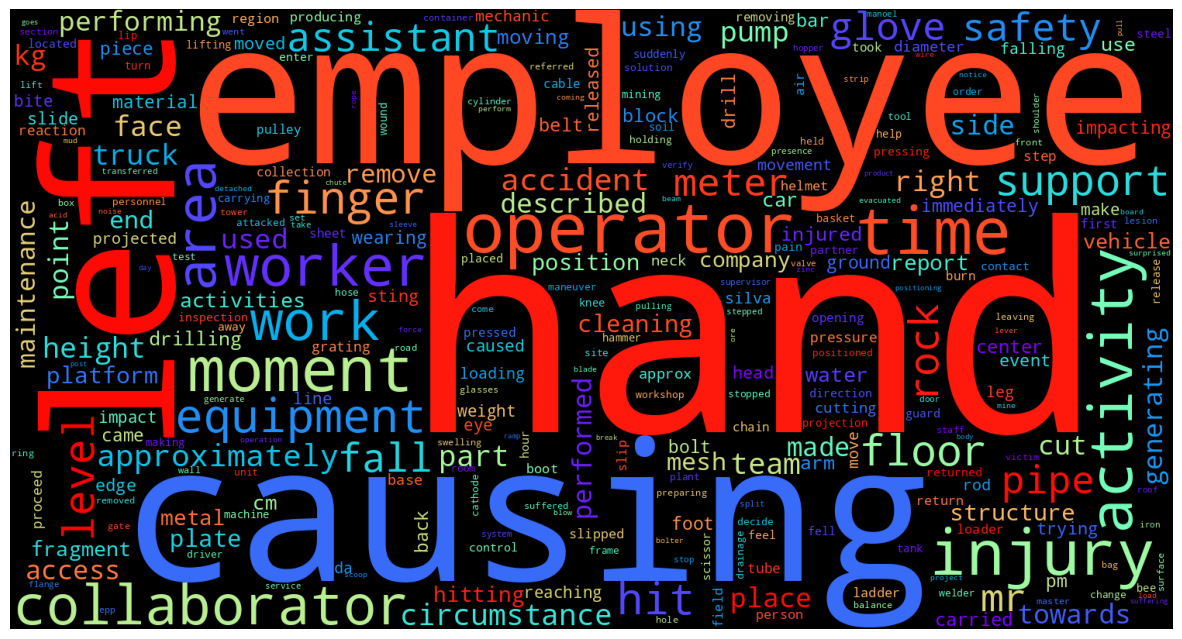

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1500, height=800, random_state=0, background_color='black', colormap='rainbow',
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(df['normalized description'].values))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# TF-IDF Model

In [ ]:
from sklearn.model_selection import train_test_split



# train test validation spliting
input_df = df['normalized description']
output_df = df['Accident Level']


from sklearn.model_selection import train_test_split

# Split the data into training and temporary data (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(input_df, output_df, test_size=0.2, random_state=42)

# Split the temporary data into testing and validation sets (50% testing, 50% validation from the temporary data)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


print(f"Training data shape : {X_train.shape} \nTest data shape : {X_test.shape} \nValidation data shape : {X_val.shape}")

Training data shape : (340,) 
Test data shape : (68,) 
Validation data shape : (17,)


In [ ]:
# X_train.to_list()
# y_train.to_list()
text = X_train[17]

In [ ]:
# Features and labels
X_train_norm, y_train = X_train.tolist(), y_train.tolist()
X_test_norm, y_test = X_test.tolist(), y_test.tolist()
X_val_norm, y_val = X_val.tolist(), y_val.tolist()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

In [ ]:
X_train_tfidf

<340x2306 sparse matrix of type '<class 'numpy.float64'>'
	with 8277 stored elements in Compressed Sparse Row format>

In [ ]:
X_val_tfidf

<17x2306 sparse matrix of type '<class 'numpy.float64'>'
	with 353 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf

<68x2306 sparse matrix of type '<class 'numpy.float64'>'
	with 1435 stored elements in Compressed Sparse Row format>

In [ ]:
# Classifiers

# Classifiers
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score


names = [
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "XGBoost",
    "AdaBoost",
]

models = [
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    XGBClassifier(objective='multi:softmax',
                            num_class=5),
    AdaBoostClassifier()
]

In [ ]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val,X_test,y_test,names = names, models = models):
    score_df, score_train, score_val,score_test = pd.DataFrame(), [], [],[]
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_test_pred, y_val_pred = model.predict(X_train), model.predict(X_test), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
        score_test.append(accuracy_score(y_test, y_test_pred))


    score_df["Classifier"], score_df["Training accuracy"],score_df["Test accuracy"],score_df["Validation accuracy"] = names, score_train,score_test,score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [ ]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val,X_test_tfidf,y_test, names = names, models = models)


,Classifier,Training accuracy,Test accuracy,Validation accuracy
0,KNN Classifier,0.729412,0.779412,0.882353
2,Linear SVM,0.847059,0.779412,0.882353
3,Random Forest,0.994118,0.779412,0.882353
5,AdaBoost,0.738235,0.764706,0.882353
4,XGBoost,0.994118,0.735294,0.764706
1,Decision Tree,0.994118,0.632353,0.588235


- As we can see from above the table, Random forest and xgboost model perform well as a baseline model. So, next will be doing the hyperparameter tunning with these 2 models only.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels=None, figsize=(8, 6)):
    """
    Plot a confusion matrix using Seaborn.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: List of class labels (optional)
    - figsize: Size of the figure (default is (8, 6))
    """
    cm = confusion_matrix(y_true, y_pred)

    if labels is None:
        labels = list(set(y_true))

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [ ]:
# XGboost
model =  XGBClassifier()
model.fit(X_train_tfidf, y_train)
y_train_pred, y_test_pred, y_val_pred = model.predict(X_train_tfidf), model.predict(X_test_tfidf), model.predict(X_val_tfidf)

print("Xgboost training set accuracy score :", accuracy_score(y_train, y_train_pred))
print("Xgboost test set accuracy score :", accuracy_score(y_test, y_test_pred))
print("Xgboost validation set accuracy score :", accuracy_score(y_val, y_val_pred))

# plot_confusion_matrix(y_train,y_train_pred,labels=["I","II","III","IV","V"])


Xgboost training set accuracy score : 0.9941176470588236
Xgboost test set accuracy score : 0.7352941176470589
Xgboost validation set accuracy score : 0.7647058823529411


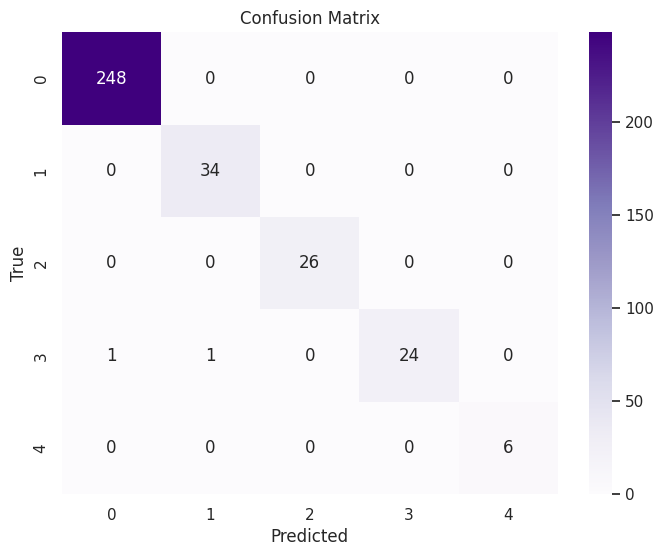

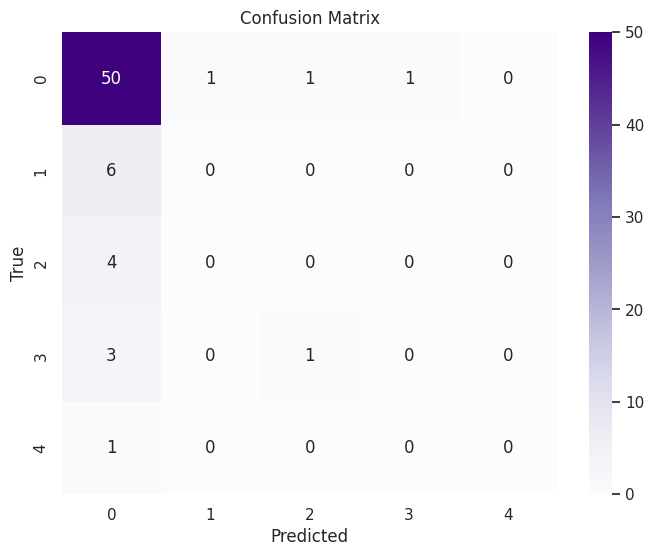

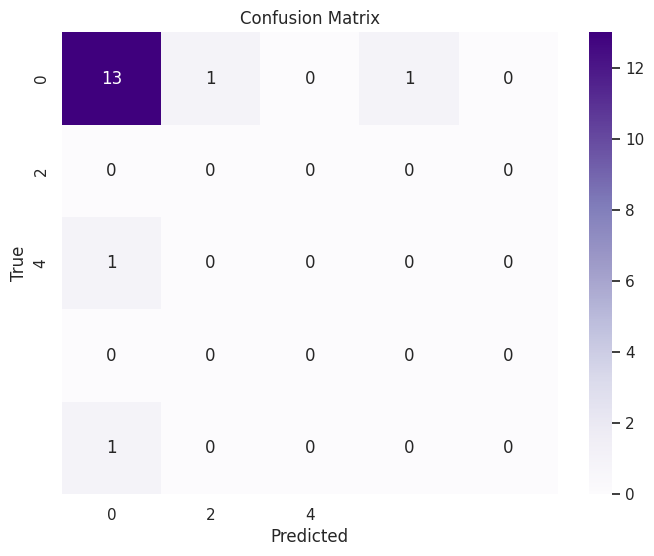

In [ ]:
plot_confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(y_val,y_val_pred)


In [ ]:
## HYper paramter tunning


### HYPER-PARAMETER TUNNING

from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def xgb_multiclass_gridsearch(X_train, y_train, X_test, y_test):
    # Define the XGBoost classifier for multiclass classification
    xgbc = XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)))

    # Define the parameter grid to search over
    param_grid = {
        'max_depth': [3, 4, 5, 10],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [50, 100, 200],
        'gamma': [0, 0.1, 0.5],

    }

    # Define the grid search object
    grid_search = GridSearchCV(
        estimator=xgbc,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=2
    )

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print(grid_search.best_params_)

    # Use the best hyperparameters to fit the XGBoost classifier to the data
    best_xgbc = XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), **grid_search.best_params_)
    best_xgbc.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = best_xgbc.predict(X_test)

    return best_xgbc, y_pred


best_xgbr, y_pred_xgb = xgb_multiclass_gridsearch(X_train_tfidf, y_train, X_test_tfidf, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier for multiclass classification
model = XGBClassifier(objective='multi:softmax',
                            num_class=5,
                            gamma=0.5, # default gamma value
                            learning_rate=0.1,
                            max_depth=5, # re-optimized from v2
                            reg_lambda=1, # default L2 value
                            subsample=0.8, # tried but not ideal
                            colsample_bytree=0.3, # tried but not ideal
                            n_estimators=200,
                            # early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)

# Fit the model to the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on training, test, and validation sets
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)
y_val_pred = model.predict(X_val_tfidf)

# Evaluate and print accuracy scores
print("Xgboost training set accuracy score:", accuracy_score(y_train, y_train_pred))
print("Xgboost test set accuracy score:", accuracy_score(y_test, y_test_pred))
print("Xgboost validation set accuracy score:", accuracy_score(y_val, y_val_pred))


Xgboost training set accuracy score: 0.9794117647058823
Xgboost test set accuracy score: 0.7794117647058824
Xgboost validation set accuracy score: 0.7647058823529411


In [ ]:
class_weights = len(pd.DataFrame(y_train)[0]) / (5 * 5*pd.DataFrame(y_train)[0].value_counts())
class_weights

0    0.054839
1    0.400000
2    0.523077
3    0.523077
4    2.266667
Name: 0, dtype: float64

In [ ]:
# Calculate class weights based on class frequencies
class_weights = len(pd.DataFrame(y_train)[0]) / (5*pd.DataFrame(y_train)[0].value_counts())
class_weights
# Create a dictionary of class weights
class_weights_dict = {class_label: weight for class_label, weight in zip(class_weights.index, class_weights)}

# Create XGBoost classifier with class weights
xgb_classifier = XGBClassifier(
    # objective='multi:softmax',
    num_class=len(set(y_train)),
    scale_pos_weight=class_weights_dict
)

# Fit the model to the training data
xgb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on training, test, and validation sets
y_train_pred = xgb_classifier.predict(X_train_tfidf)
y_test_pred = xgb_classifier.predict(X_test_tfidf)
y_val_pred = xgb_classifier.predict(X_val_tfidf)

# Evaluate and print accuracy scores
print("Xgboost training set accuracy score:", accuracy_score(y_train, y_train_pred))
print("Xgboost test set accuracy score:", accuracy_score(y_test, y_test_pred))
print("Xgboost validation set accuracy score:", accuracy_score(y_val, y_val_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[18:04:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.




Xgboost training set accuracy score: 0.9941176470588236
Xgboost test set accuracy score: 0.7352941176470589
Xgboost validation set accuracy score: 0.7647058823529411


In [ ]:
X_val_tfidf

<17x2306 sparse matrix of type '<class 'numpy.float64'>'
	with 353 stored elements in Compressed Sparse Row format>

In [ ]:
xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 4, 0, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0,
       0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3,
       3, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 1, 3, 0, 4, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0,

# Random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def random_forest_hyperparameter_tuning(X_train, y_train, X_test, y_test):
    # Define the Random Forest classifier
    rf_model = RandomForestClassifier(class_weight=class_weights_dict)

    # Define the parameter grid to search over
    param_grid = {
        'n_estimators': [100, 200,500],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 3,8],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    # Define the grid search object
    grid_search = GridSearchCV(
        estimator=rf_model,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=2,
    )

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("Best Parameters: ", grid_search.best_params_)

    # Use the best hyperparameters to fit the Random Forest classifier to the data
    best_rf_model = RandomForestClassifier(**grid_search.best_params_)
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = best_rf_model.predict(X_test)

    # Print the accuracy score
    print("Random Forest test set accuracy score:", accuracy_score(y_test, y_pred))

    return best_rf_model, y_pred



In [ ]:
best_xgbr, y_pred_xgb = random_forest_hyperparameter_tuning(X_train_tfidf, y_train, X_test_tfidf, y_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest test set accuracy score: 0.7794117647058824


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use the best hyperparameters to create a new Random Forest model
best_rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    # min_samples_split=2,
    # min_samples_leaf=1,
    max_features='log2',
    class_weight=class_weights_dict,
    random_state=42,
)

# Fit the model to your training data
best_rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the validation or test set
y_pred = best_rf_model.predict(X_val_tfidf)

# Make predictions on training, test, and validation sets
y_train_pred = best_rf_model.predict(X_train_tfidf)
y_test_pred = best_rf_model.predict(X_test_tfidf)
y_val_pred = best_rf_model.predict(X_val_tfidf)

# Evaluate and print accuracy scores
print("Random Forest training set accuracy score:", accuracy_score(y_train, y_train_pred))
print("Random Forest test set accuracy score:", accuracy_score(y_test, y_test_pred))
print("Random Forest validation set accuracy score:", accuracy_score(y_val, y_val_pred))


Random Forest training set accuracy score: 0.9911764705882353
Random Forest test set accuracy score: 0.7794117647058824
Random Forest validation set accuracy score: 0.8823529411764706


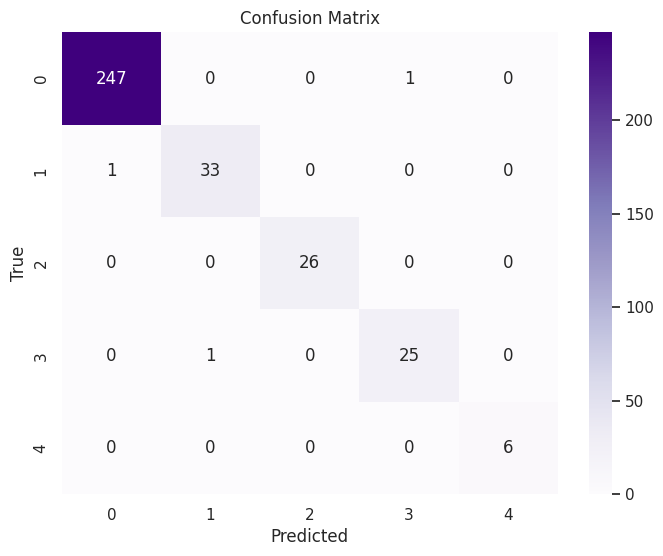

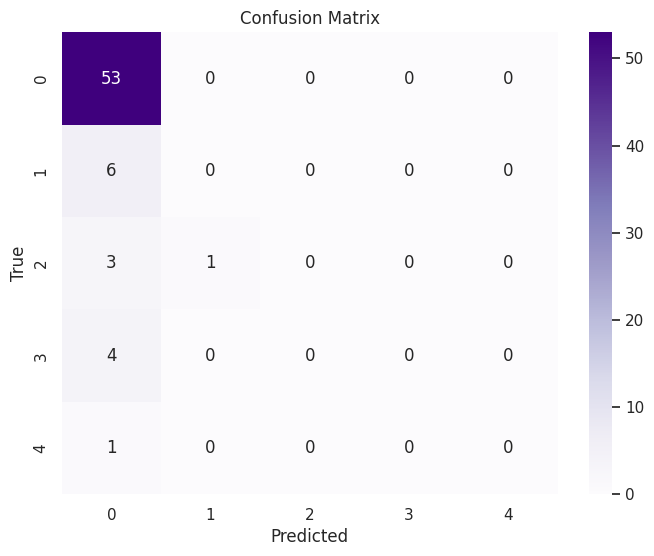

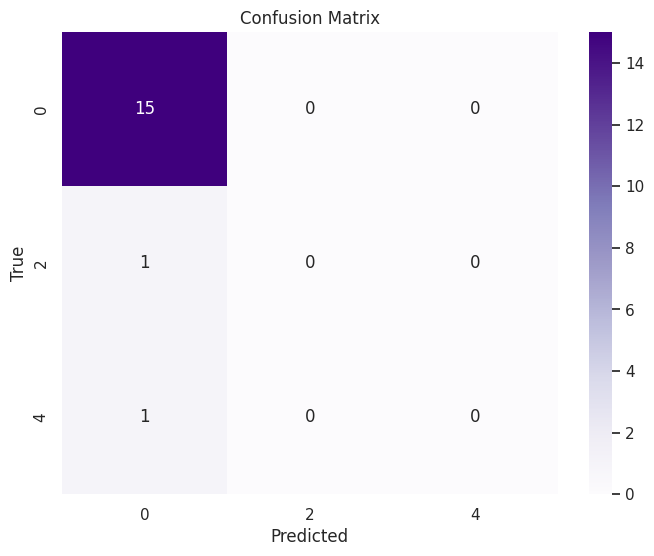

In [ ]:
plot_confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(y_val,y_val_pred)

# input based prediction

In [ ]:
def text_input_prediction(model= None, text=None,TfidfVec=None):
  normalise_text = text_normalizer(text)
  text_tfidf_vector = TfidfVec.transform([normalise_text])

  prediction = model.predict(text_tfidf_vector)
  return prediction[0]

In [ ]:
input_text = "removing drill rod maintenance supervisor proceeds loosen support centralizer facilitate removal seeing supports end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers drilling bar beam jumbo"

In [ ]:
text_input_prediction(best_rf_model,input_text,TfidfVec)

0